# Ravi Teja Kedarasetty
## Project 1 - Bank Marketing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bank-marketing.csv")

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [49]:
df.describe

<bound method NDFrame.describe of        age  job  salary  marital  education  targeted  default  balance  \
0       40    4       9        1          2         1        0     3036   
1       26    9       7        2          1         1        0      945   
2       15    2      10        1          1         1        0      918   
3       29    1       4        1          3         0        0     2420   
4       15   11       0        2          3         0        0      917   
...    ...  ...     ...      ...        ...       ...      ...      ...   
45206   33    9       7        1          2         1        0     1741   
45207   53    5       6        0          0         1        0     2639   
45208   54    5       6        1          1         1        0     5455   
45209   39    1       4        1          1         1        0     1584   
45210   19    2      10        1          1         1        0     3779   

       housing  loan  contact  day  month  duration  campaign  pd

### Pdays

### Pdays indicates "Number of days that passed by after the client was last contacted from a previous campaign"
-1 indicates the client has not been contacted before

In [7]:
print("mean of pdays: ",df['pdays'].mean())
print("meadian of pdays: ",df['pdays'].median())
print("mode of pdays: ",df['pdays'].mode())

mean of pdays:  40.19782796222158
meadian of pdays:  -1.0
mode of pdays:  0   -1
dtype: int64


In [8]:
df['npdays'] = df['pdays']

In [9]:
df['pdays'] = df['pdays'].replace(-1, 0)

In [10]:
print("mean of pdays: ",df['pdays'].mean())
print("meadian of pdays: ",df['pdays'].median())
print("mode of pdays: ",df['pdays'].mode())

mean of pdays:  41.015195417044524
meadian of pdays:  0.0
mode of pdays:  0    0
dtype: int64


In [11]:
df.drop("npdays",axis = 1, inplace = True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


### horizontal bar graph with the median values of balance for each education level value

<AxesSubplot:xlabel='balance', ylabel='education'>

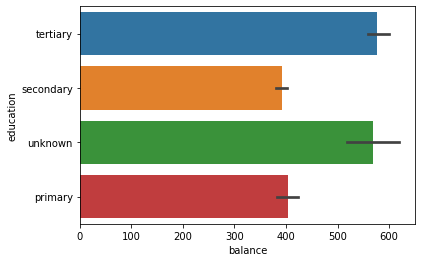

In [12]:
sns.barplot(x="balance", y="education",estimator=np.median, data=df)

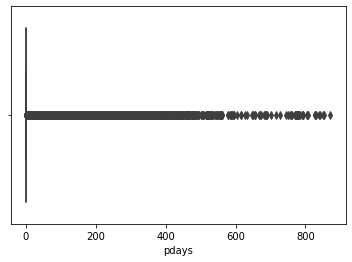

In [13]:
out = sns.boxplot(x=df["pdays"])

Yes, there are many outliers.

## Taking a backup

In [14]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


In [15]:
backup=df

## Converting into convinient form

In [16]:
labelencoder = LabelEncoder()

In [17]:
le = preprocessing.LabelEncoder()

In [18]:
df=df.apply(LabelEncoder().fit_transform)

In [19]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,40,4,9,1,2,1,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,7,2,1,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,10,1,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,4,1,3,0,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,0,2,3,0,0,917,0,0,2,4,8,198,0,0,0,3,0


### Dividing the categorical and numerical columns

In [20]:
numerical=[]
catogrical=[]
for i in df.columns:
    if df[i].dtypes=='int64':
        numerical.append(i)
    else:
        catogrical.append(i)

In [21]:
print(numerical)
print(catogrical)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


### Plots for Numerical data

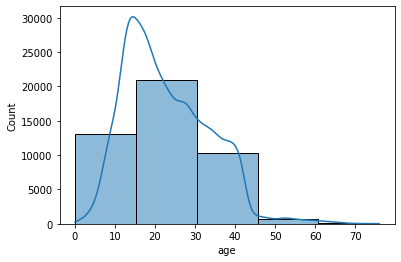

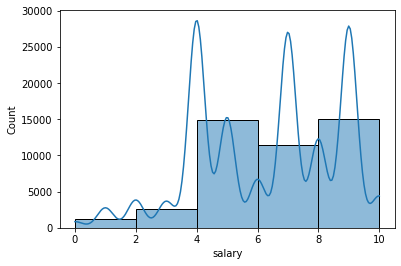

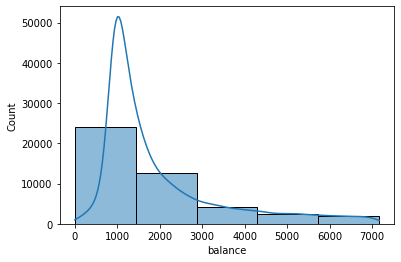

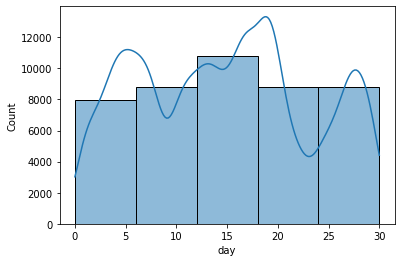

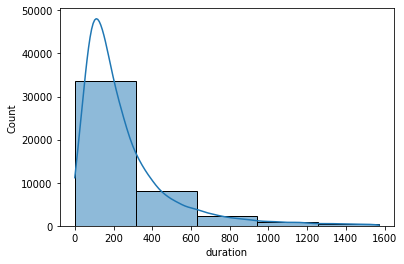

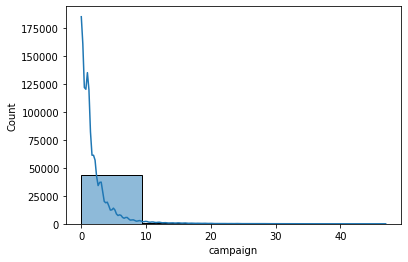

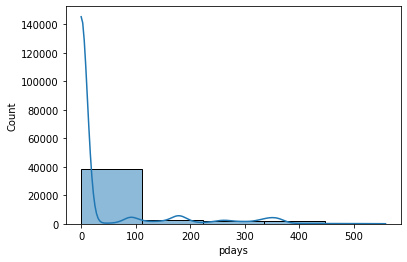

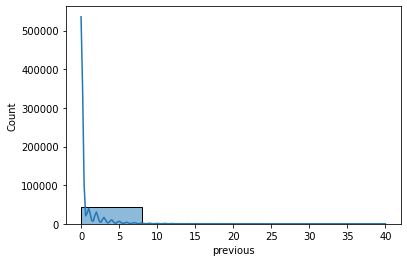

In [22]:
for i in numerical:
    sns.histplot(x = i, data = df, bins = 5, kde =True)
    plt.show()

### Plots for categorical Data

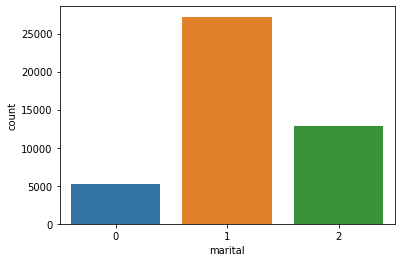

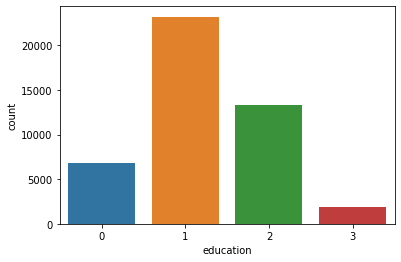

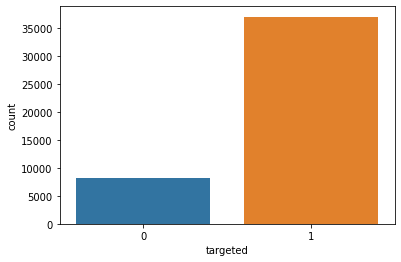

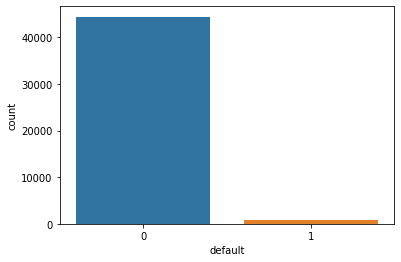

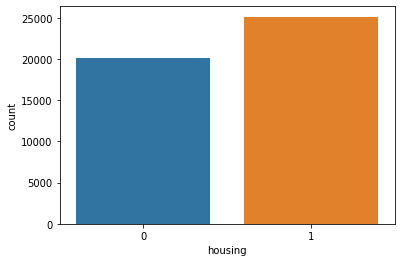

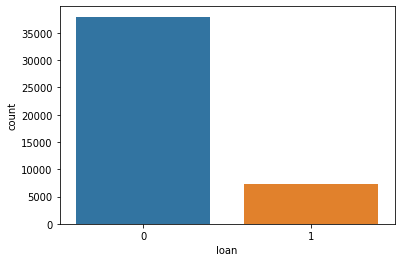

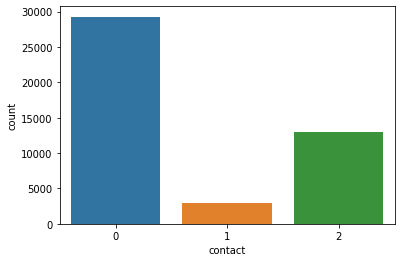

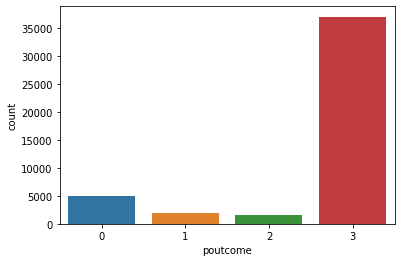

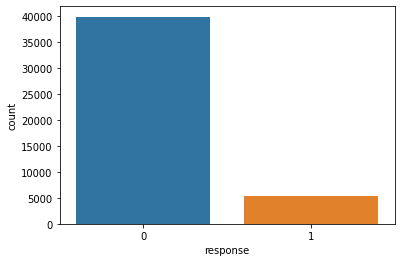

In [23]:
for i in catogrical:
    if df[i].nunique() < 5:
        sns.countplot(x = df[i])
        plt.show()

### Heatmap for observing the corelation

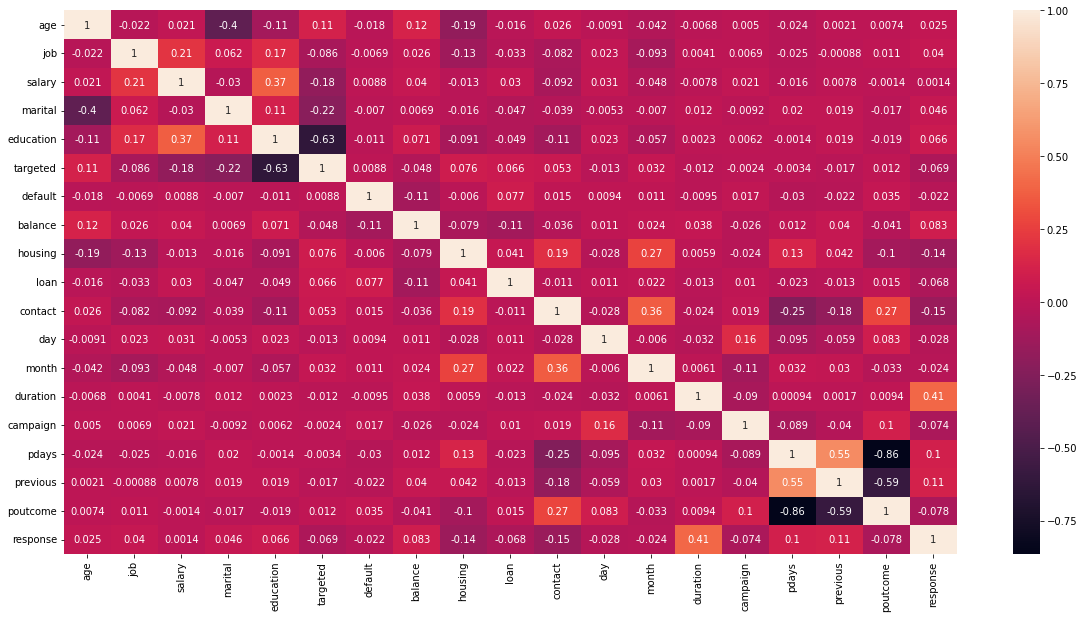

In [24]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Since the previous campaign data is not so corelated with response, it is not much useful

#### Pdays and Poutcome is also weakly corelated with reponse

Yes, I'm including Pdays as well in building the model,
-1 in pdays indicates that the client is not contacted previously, so I have replaced its value with 0 by using 
"df['pdays'] = df['pdays'].replace(-1, 0)"

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Predictive model 1: Logistic regression

In [27]:
lr=LogisticRegression()

In [28]:
model=lr.fit(X_train,Y_train)

In [29]:
Y_pred=model.predict(X_test)

In [30]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [31]:
confusion_matrix(Y_test,Y_pred)

array([[9740,  238],
       [1076,  249]], dtype=int64)

In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9978
           1       0.51      0.19      0.27      1325

    accuracy                           0.88     11303
   macro avg       0.71      0.58      0.61     11303
weighted avg       0.85      0.88      0.86     11303



#### RFE

In [33]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2)

r = rfe.fit(x, y)
for i in range(x.shape[1]):
    print('Column: %1d, Selected %s, Rank: %.1f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 14.0
Column: 1, Selected False, Rank: 11.0
Column: 2, Selected False, Rank: 10.0
Column: 3, Selected False, Rank: 7.0
Column: 4, Selected False, Rank: 8.0
Column: 5, Selected False, Rank: 4.0
Column: 6, Selected False, Rank: 3.0
Column: 7, Selected False, Rank: 17.0
Column: 8, Selected True, Rank: 1.0
Column: 9, Selected True, Rank: 1.0
Column: 10, Selected False, Rank: 2.0
Column: 11, Selected False, Rank: 12.0
Column: 12, Selected False, Rank: 9.0
Column: 13, Selected False, Rank: 15.0
Column: 14, Selected False, Rank: 5.0
Column: 15, Selected False, Rank: 16.0
Column: 16, Selected False, Rank: 6.0
Column: 17, Selected False, Rank: 13.0


In [34]:
vif = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif)

[6.266573297717899, 2.9562091538584174, 9.75096107915358, 4.980461143100597, 6.143820531600754, 7.646071030243963, 1.036009029296225, 2.9275190786685856, 2.6391623995862714, 1.2220837396191286, 1.999508017903704, 4.200150654960046, 5.298590445777463, 2.1394487644313944, 1.4072850813041136, 3.3590633895742883, 1.6582972049077616, 19.717968197794676]


In [35]:
for i,j in zip(x.columns,vif):
    print(i,j)

age 6.266573297717899
job 2.9562091538584174
salary 9.75096107915358
marital 4.980461143100597
education 6.143820531600754
targeted 7.646071030243963
default 1.036009029296225
balance 2.9275190786685856
housing 2.6391623995862714
loan 1.2220837396191286
contact 1.999508017903704
day 4.200150654960046
month 5.298590445777463
duration 2.1394487644313944
campaign 1.4072850813041136
pdays 3.3590633895742883
previous 1.6582972049077616
poutcome 19.717968197794676


In [36]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(x, y)
print(pvalues)

[2.24495107e-032 1.41257633e-041 7.87379454e-001 4.87449759e-008
 1.74292216e-021 4.93477945e-010 2.31527677e-006 0.00000000e+000
 1.40128480e-086 2.79337524e-040 1.23084479e-274 7.57769318e-039
 2.78581489e-011 0.00000000e+000 2.70127036e-287 0.00000000e+000
 0.00000000e+000 1.43725371e-024]


In [37]:
for i,j in zip(x.columns,pvalues):
    print(i,j)

age 2.2449510744213747e-32
job 1.4125763345435744e-41
salary 0.7873794537689889
marital 4.8744975856275684e-08
education 1.7429221644637613e-21
targeted 4.934779447695486e-10
default 2.315276765388257e-06
balance 0.0
housing 1.4012848034921748e-86
loan 2.793375244102348e-40
contact 1.2308447893732065e-274
day 7.577693176289936e-39
month 2.7858148914909005e-11
duration 0.0
campaign 2.701270356057966e-287
pdays 0.0
previous 0.0
poutcome 1.4372537073338641e-24


## Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train, Y_train)
Y_rf_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9978
           1       0.61      0.40      0.49      1325

    accuracy                           0.90     11303
   macro avg       0.77      0.69      0.72     11303
weighted avg       0.89      0.90      0.89     11303



## Precision, Recall, accuracy of your model

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)

In [41]:
model = clf.fit(X_train,Y_train)

In [42]:
Y_pred= model.predict(X_test)

In [43]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9031230646730957


In [44]:
print('Error Metrics')
em = metrics.classification_report(Y_test, Y_pred)
print(em)

Error Metrics
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9978
           1       0.63      0.42      0.50      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.69      0.73     11303
weighted avg       0.89      0.90      0.89     11303



In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
all_output = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 5)

In [47]:
all_output

array([0.90150398, 0.90533766, 0.90032439, 0.90812565, 0.9078307 ])

In [48]:
print('over all result:',all_output.mean()*100)

over all result: 90.4624475268317


## Random Forest is preffered over Logistic as it is giving 90% accuracy
Random Forest has performed better on test-set with better accuracy.